# Dropsondes
Dropsondes were launched from Polar 5 providing profiles of air temperature, humidity, pressure, and the horizontal wind vector between flight altitude (3-4 km) and the surface. The full dataset is available on PANGAEA for [ACLOUD](https://doi.pangaea.de/10.1594/PANGAEA.900204), [AFLUX](https://doi.pangaea.de/10.1594/PANGAEA.921996), and [MOSAiC-ACA](https://doi.pangaea.de/10.1594/PANGAEA.933581). Each NetCDF file contains dropsondes of a single flight ordered into groups.

## Data access
* To load the data we first load the (AC)³airborne meta data catalogue. More information on the catalog can be found [here](https://github.com/igmk/ac3airborne-intake#ac3airborne-intake-catalogue).

In [1]:
import ac3airborne

List of flights, where dropsondes are available:

In [2]:
cat = ac3airborne.get_intake_catalog()
list(cat.Polar5.DROPSONDES)

['ACLOUD_P5_RF05',
 'ACLOUD_P5_RF06',
 'ACLOUD_P5_RF07',
 'ACLOUD_P5_RF10',
 'ACLOUD_P5_RF11',
 'ACLOUD_P5_RF13',
 'ACLOUD_P5_RF14',
 'ACLOUD_P5_RF16',
 'ACLOUD_P5_RF17',
 'ACLOUD_P5_RF18',
 'ACLOUD_P5_RF19',
 'ACLOUD_P5_RF20',
 'ACLOUD_P5_RF21',
 'ACLOUD_P5_RF22',
 'ACLOUD_P5_RF23',
 'AFLUX_P5_RF02',
 'AFLUX_P5_RF04',
 'AFLUX_P5_RF05',
 'AFLUX_P5_RF06',
 'AFLUX_P5_RF07',
 'AFLUX_P5_RF08',
 'AFLUX_P5_RF09',
 'AFLUX_P5_RF10',
 'AFLUX_P5_RF15',
 'MOSAiC-ACA_P5_RF05',
 'MOSAiC-ACA_P5_RF06',
 'MOSAiC-ACA_P5_RF07',
 'MOSAiC-ACA_P5_RF08',
 'MOSAiC-ACA_P5_RF09',
 'MOSAiC-ACA_P5_RF10',
 'MOSAiC-ACA_P5_RF11']

## Dataset
To get an overview of the variables recorded by the dropsondes, we load the first dropsonde released during ACLOUD RF05.

In [3]:
ds_dsd = cat['Polar5']['DROPSONDES']['ACLOUD_P5_RF05'](i_sonde=1).to_dask()
ds_dsd

<xarray.Dataset>
Dimensions:     (z: 529)
Dimensions without coordinates: z
Data variables:
    GPS_Alt     (z) float32 ...
    Baro_Alt    (z) float32 ...
    Time        (z) float32 ...
    Lat         (z) float32 ...
    Lon         (z) float32 ...
    Pressure    (z) float32 ...
    Temp        (z) float32 ...
    Temp_recon  (z) float32 ...
    RHum        (z) float32 ...
    RHum_recon  (z) float32 ...
    Wind_vel    (z) float32 ...
    Wind_dir    (z) float32 ...
Attributes:
    Dropsonde_number_of_flight:  [1]
    Launch_Time_UTC:             ['09:09:10']
    Sonde_ID:                    ['162715269/RS904']

### View variables
Below are vertical profiles of temperature, relative humidity, wind velocity and wind direction of that dropsondes shown.

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use("../mplstyle/book")

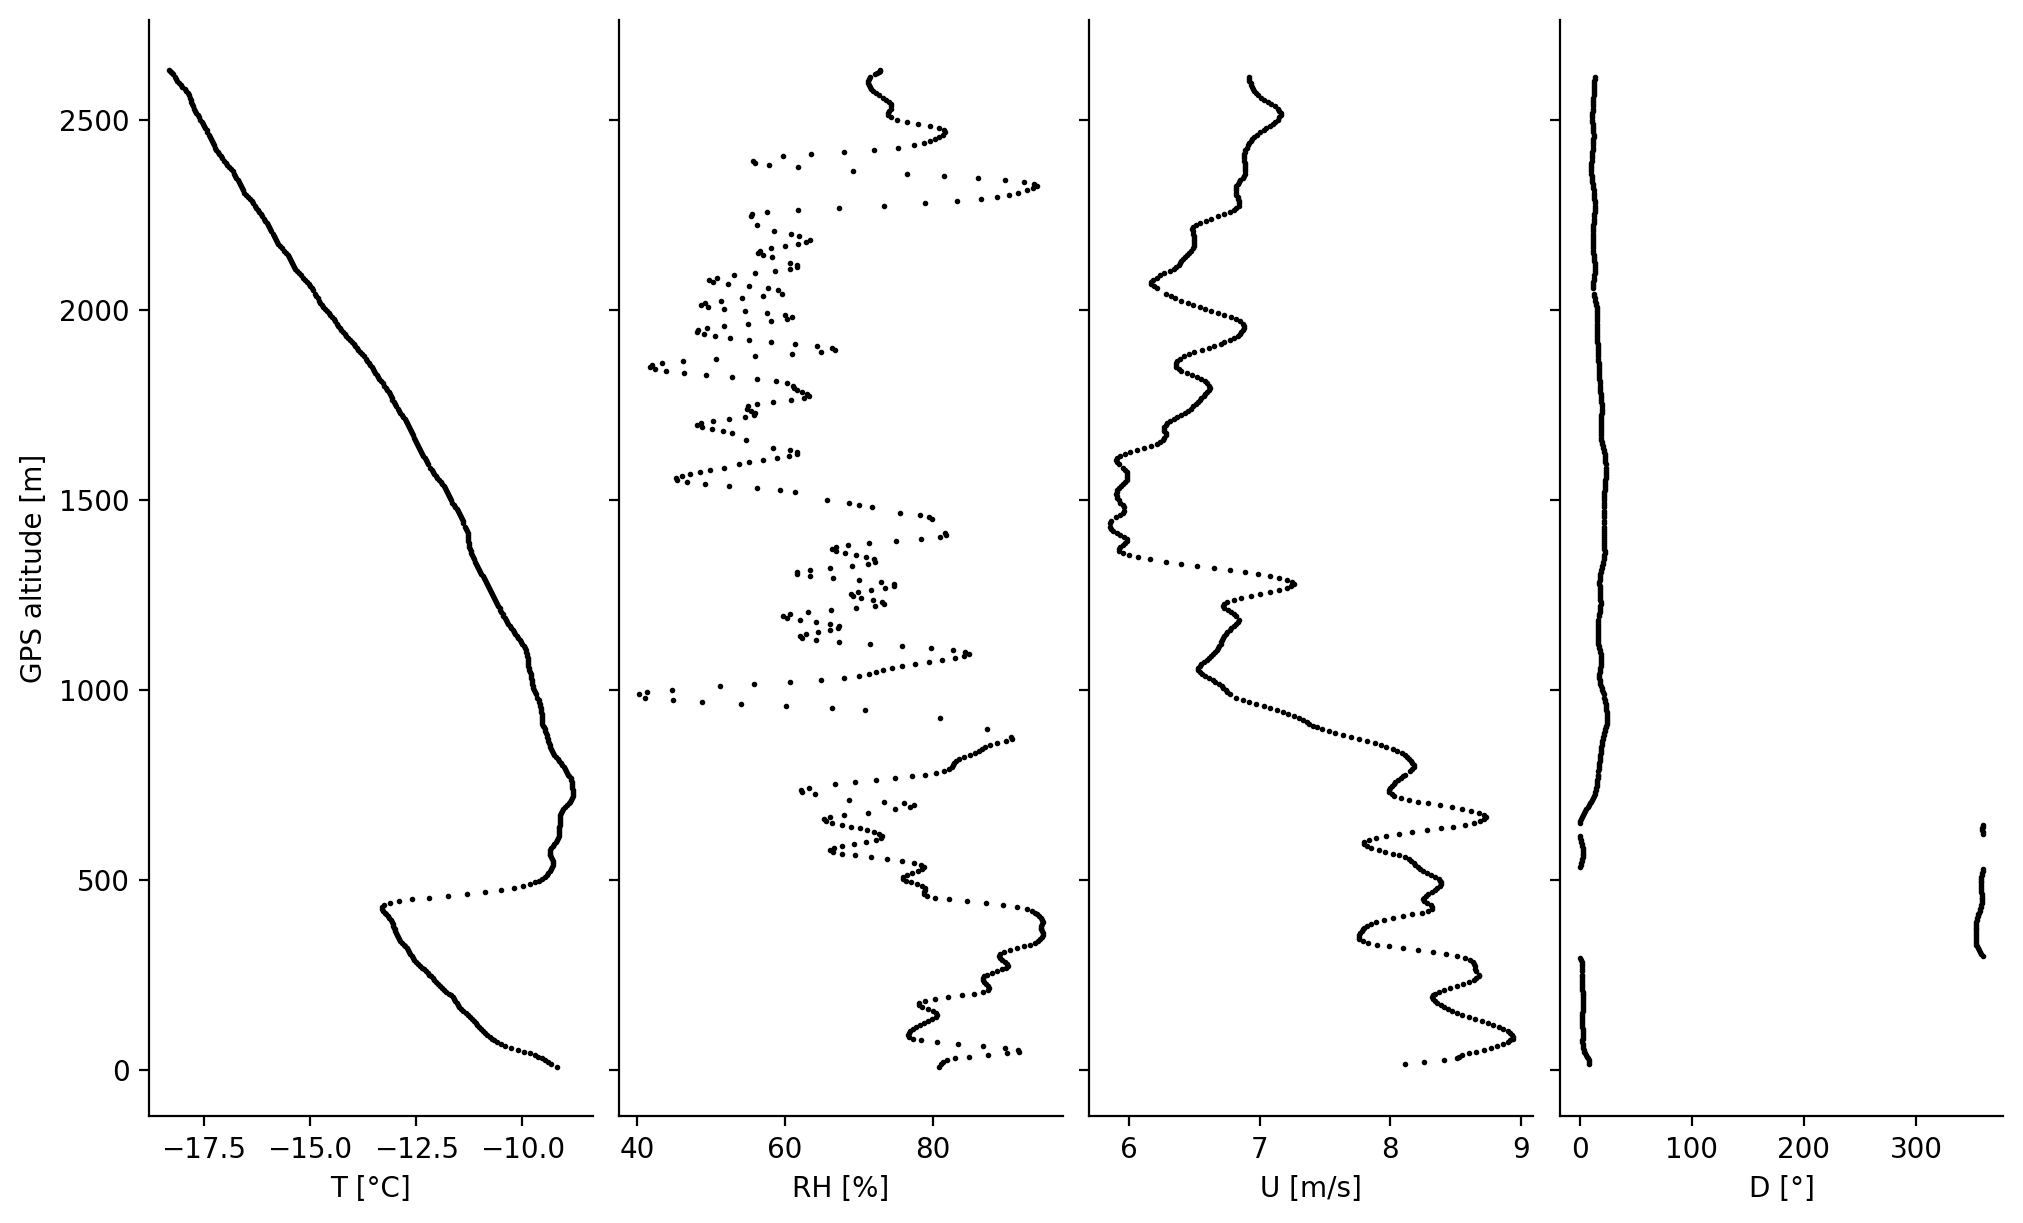

In [5]:
fig, ax = plt.subplots(1, 4, sharey=True)

var_names = ['Temp_recon', 'RHum_recon', 'Wind_vel', 'Wind_dir']
labels = ['T [°C]', 'RH [%]', 'U [m/s]', 'D [°]']

kwargs = dict(s=1, color='k')
for i, var_name in enumerate(var_names):
    
    ax[i].scatter(ds_dsd[var_name], ds_dsd.GPS_Alt, **kwargs)
    
    ax[i].set_xlabel(labels[i])

ax[0].set_ylabel('GPS altitude [m]')
    
plt.show()

## Load Polar 5 flight phase information
Polar 5 flights are divided into segments to easily access start and end times of flight patterns. For more information have a look at the respective [github](https://github.com/igmk/flight-phase-separation) repository.

At first we want to load the flight segments of (AC)³airborne

In [6]:
meta = ac3airborne.get_flight_segments() 

Create list with all dropsondes during the campaigns

In [7]:
ds_dict = {'ACLOUD': {}, 'AFLUX': {}, 'MOSAiC-ACA': {}}
for platform in meta.values():
    for flight in platform.values():
        for segment in flight['segments']:
            if 'dropsondes' in segment.keys():
                for sonde in segment['dropsondes']:
                    params = {'segment_id': segment['segment_id'],
                              'flight_id': flight['flight_id'],
                              'date': flight['date'],
                              'name': flight['name'],
                             }
                    ds_dict[flight['mission']][sonde] = params

In [8]:
ds_dict

{'ACLOUD': {'ACLOUD_P5_RF05_DS01': {'segment_id': 'ACLOUD_P5_RF05_hl02',
   'flight_id': 'ACLOUD_P5_RF05',
   'date': datetime.date(2017, 5, 25),
   'name': 'RF05'},
  'ACLOUD_P5_RF05_DS02': {'segment_id': 'ACLOUD_P5_RF05_hl02',
   'flight_id': 'ACLOUD_P5_RF05',
   'date': datetime.date(2017, 5, 25),
   'name': 'RF05'},
  'ACLOUD_P5_RF05_DS03': {'segment_id': 'ACLOUD_P5_RF05_hl03',
   'flight_id': 'ACLOUD_P5_RF05',
   'date': datetime.date(2017, 5, 25),
   'name': 'RF05'},
  'ACLOUD_P5_RF05_DS04': {'segment_id': 'ACLOUD_P5_RF05_hl05',
   'flight_id': 'ACLOUD_P5_RF05',
   'date': datetime.date(2017, 5, 25),
   'name': 'RF05'},
  'ACLOUD_P5_RF05_DS05': {'segment_id': 'ACLOUD_P5_RF05_hl07',
   'flight_id': 'ACLOUD_P5_RF05',
   'date': datetime.date(2017, 5, 25),
   'name': 'RF05'},
  'ACLOUD_P5_RF05_DS06': {'segment_id': 'ACLOUD_P5_RF05_hl09',
   'flight_id': 'ACLOUD_P5_RF05',
   'date': datetime.date(2017, 5, 25),
   'name': 'RF05'},
  'ACLOUD_P5_RF05_DS07': {'segment_id': 'ACLOUD_P5_RF0

Get total number of dropsondes during the campaigns

In [9]:
for mission, sondes in ds_dict.items():
    n = len(sondes.values())
    print('{n} dropsondes are available from {mission}.'.format(
        n=n, mission=mission))

55 dropsondes are available from ACLOUD.
33 dropsondes are available from AFLUX.
60 dropsondes are available from MOSAiC-ACA.


## Plots
The next sections present the entire dataset by loading all dropsondes of the three campaigns and plotting vertical profiles of temperature, humidity and horizontal wind velocity.
### Temperature profile

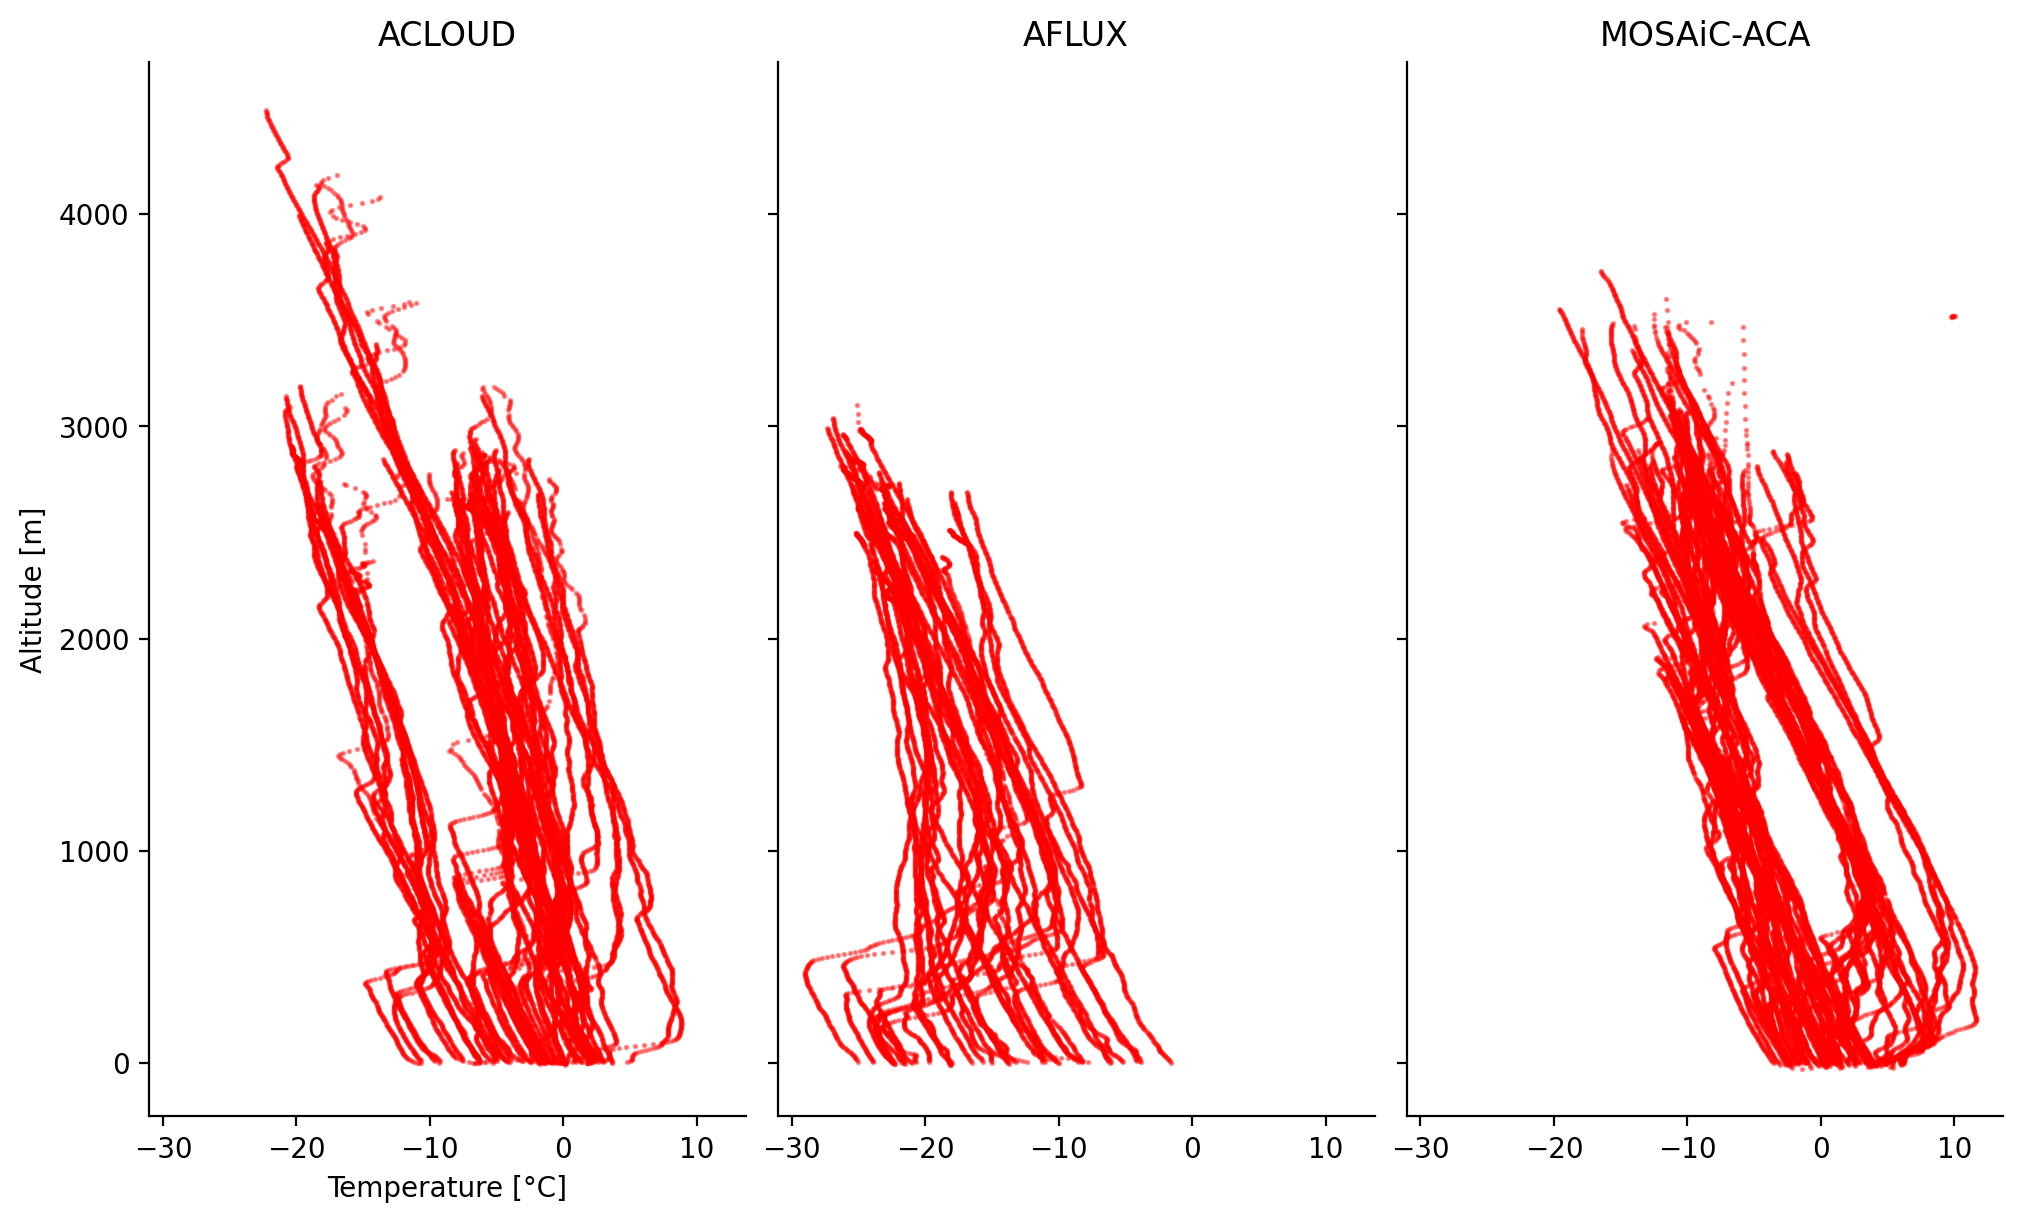

In [10]:
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True)

ax = {'ACLOUD': axes[0], 'AFLUX': axes[1], 'MOSAiC-ACA': axes[2]}

kwargs = dict(s=1, color='red', alpha=0.4)
for mission, sondes in ds_dict.items():
    
    ax[mission].set_title(mission)
    
    for sonde_id, params in ds_dict[mission].items():

        # read dropsonde data
        i_sonde = int(sonde_id[-2:])
        ds = cat['Polar5']['DROPSONDES'][params['flight_id']](i_sonde=i_sonde).to_dask()

        ax[mission].scatter(ds.Temp_recon, ds.GPS_Alt, **kwargs)

axes[0].set_ylabel('Altitude [m]')
axes[0].set_xlabel('Temperature [°C]')
   
plt.show()

### Humidity profile

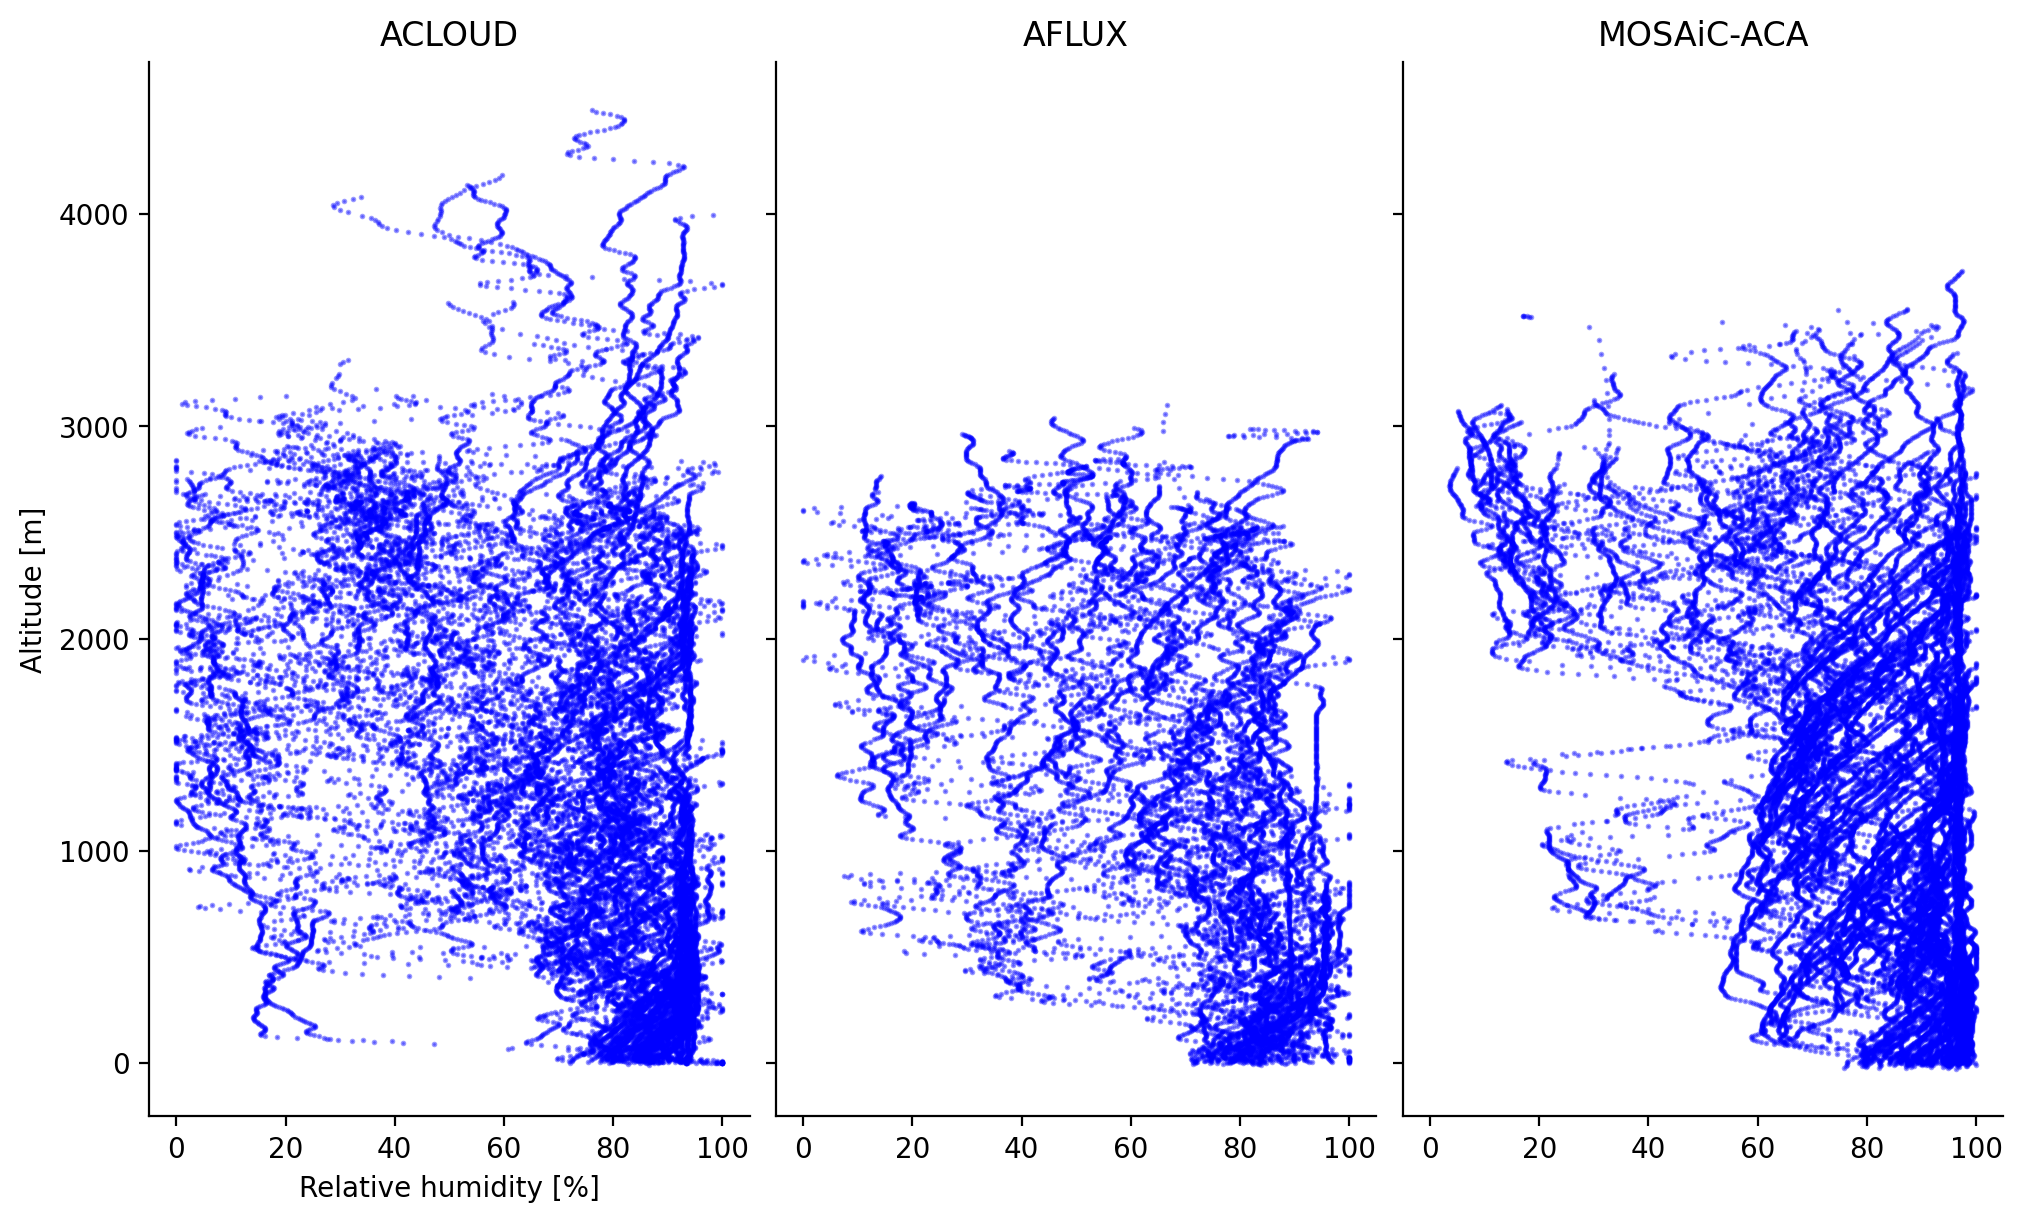

In [11]:
fig, axes = plt.subplots(1, 3, sharey=True, sharex=True)

ax = {'ACLOUD': axes[0], 'AFLUX': axes[1], 'MOSAiC-ACA': axes[2]}

kwargs = dict(s=1, color='blue', alpha=0.4)
for mission, sondes in ds_dict.items():
    
    ax[mission].set_title(mission)
    
    for sonde_id, params in ds_dict[mission].items():

        # read dropsonde data
        i_sonde = int(sonde_id[-2:])
        ds = cat['Polar5']['DROPSONDES'][params['flight_id']](i_sonde=i_sonde).to_dask()

        ax[mission].scatter(ds.RHum_recon, ds.GPS_Alt, **kwargs)

axes[0].set_ylabel('Altitude [m]')
axes[0].set_xlabel('Relative humidity [%]')

plt.show()

### Wind profile

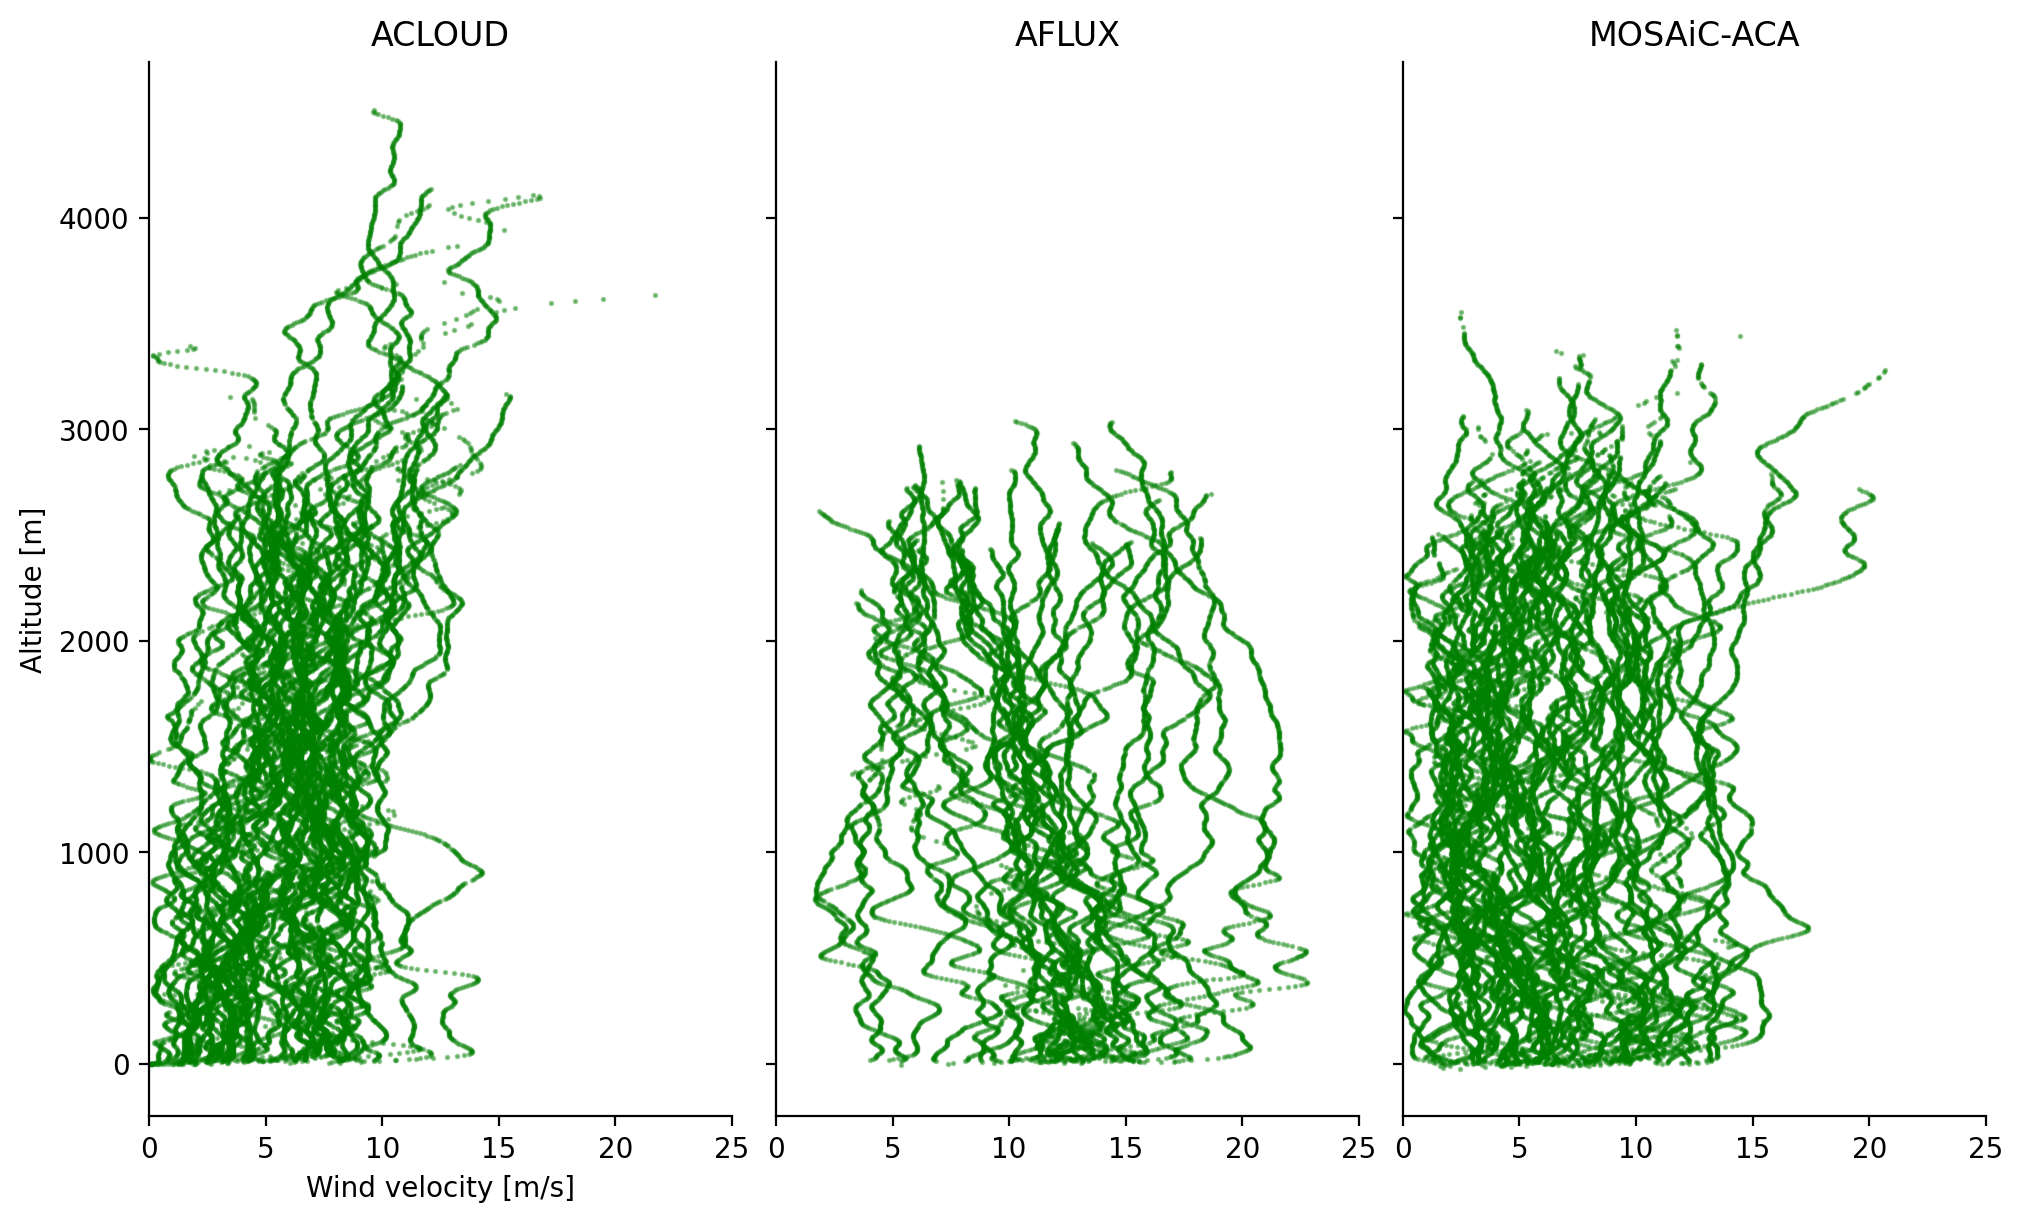

In [12]:
fig, axes = plt.subplots(1, 3, sharey=True)

ax = {'ACLOUD': axes[0], 'AFLUX': axes[1], 'MOSAiC-ACA': axes[2]}

kwargs = dict(s=1, color='green', alpha=0.4)
for mission, sondes in ds_dict.items():
    
    ax[mission].set_title(mission)
    ax[mission].set_xlim(0, 25)
    
    for sonde_id, params in ds_dict[mission].items():

        # read dropsonde data
        i_sonde = int(sonde_id[-2:])
        ds = cat['Polar5']['DROPSONDES'][params['flight_id']](i_sonde=i_sonde).to_dask()

        ax[mission].scatter(ds.Wind_vel, ds.GPS_Alt, **kwargs)

axes[0].set_ylabel('Altitude [m]')
axes[0].set_xlabel('Wind velocity [m/s]')

plt.show()